## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2


import torch

c:\Users\Ayush\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Infering from the expts

In [5]:
expts_list = r"all_expts"
expt_name = r"all_expts\expt_2024_04_02_14_44_25"
performances = pd.read_csv(os.path.join(expt_name, 'logs', 'logs.csv'))

In [6]:
def visualization(performances):
    figure = plt.figure(figsize=(10, 5))
    cols = sorted(list(performances.columns))
    for i in range(5):
        # plt.subplot(1, 5, i+1)
        plt.plot(list(range(1, len(performances)+1)), performances[cols[i]])
        plt.plot(list(range(1, len(performances)+1)), performances[cols[i+5]])
        plt.title(cols[i].split('_')[1])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'])
        plt.tight_layout()
        plt.show()

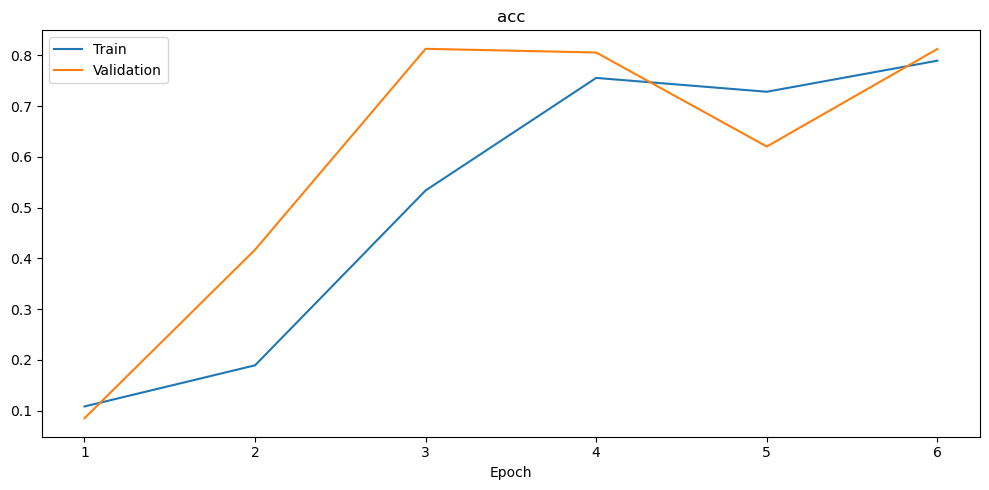

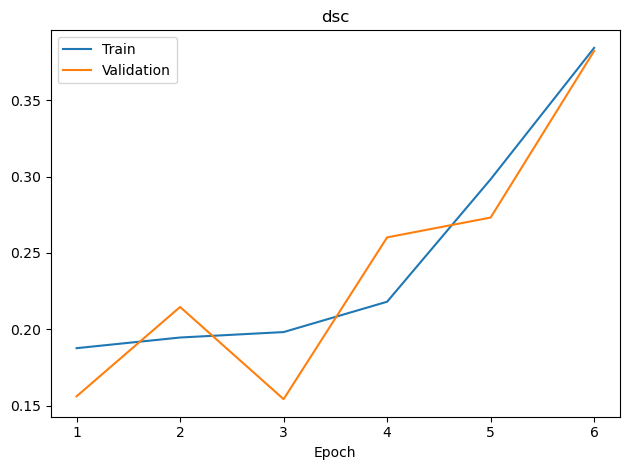

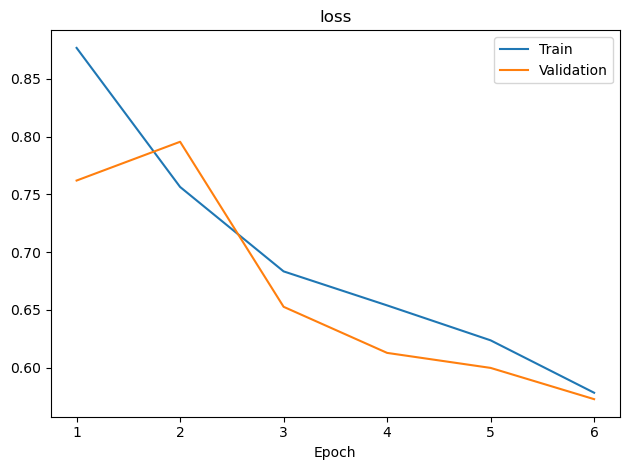

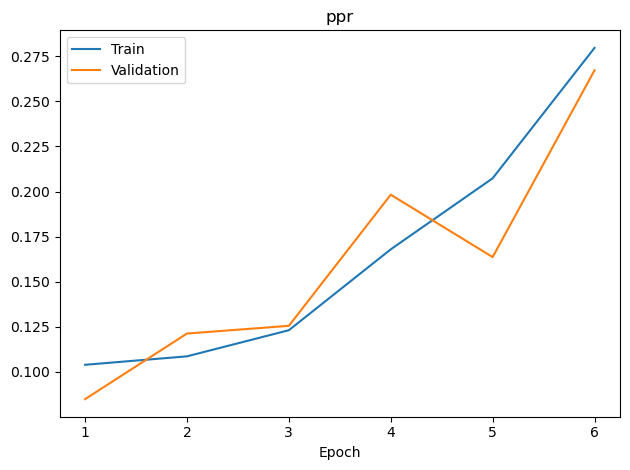

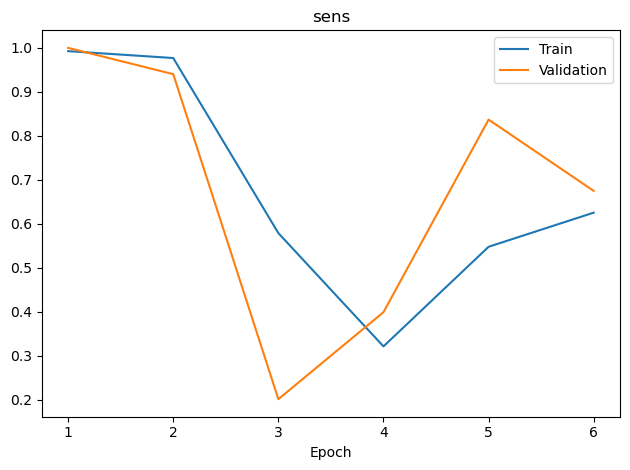

In [7]:
visualization(performances)

## Inference
- loading model
- optimizer, epoch, loss are also loaded in case we want to continue training, but I won't be coding that part here.

In [8]:
import json
with open(os.path.join(expt_name, 'config.json'), 'r') as f:
    config = json.load(f)

from utils import load_model
from network_arch import SuperUNET
model = SuperUNET()
optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])

model, optimizer, epoch, loss = load_model(model, optimizer, os.path.join(expt_name, 'models', 'best_model.pth'))

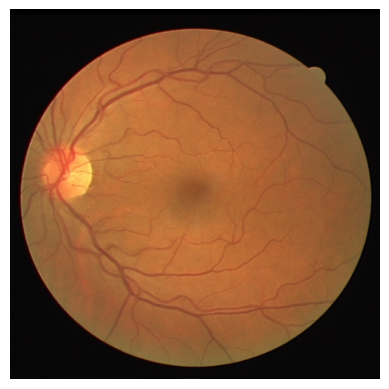

In [9]:
# let us take an image and try to segment it
from data import load_image
transform = A.Compose([
    A.Resize(config['crop_size'], config['crop_size']),
    ToTensorV2()
])

img = load_image(r'data\DRIVE\test\images\01_test.tif')
img = transform(image=img)['image']
plt.imshow(img.numpy().transpose(1,2,0))
plt.axis('off')
plt.show()



In [10]:
model =  model.to(config['device'])
img = img.unsqueeze(0).to(config['device'])

from train import segment
segmented_img = segment(img=img, model=model, device=config['device'])

generating patches: 100%|██████████| 121/121 [00:09<00:00, 13.09it/s]


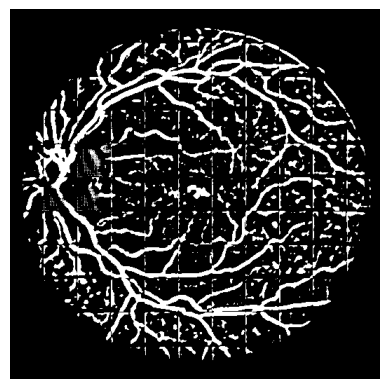

In [11]:
a = segmented_img.argmax(dim=1).squeeze(0).cpu().detach().numpy()
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()